<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-engineering/blob/master/Unit%2011%20Undersaturated-Oil%20Reservoirs/notebook/11_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit 11. Undersaturated-Oil Reservoirs**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [3]:
!git clone https://github.com/yohanesnuwara/reservoir-engineering

Cloning into 'reservoir-engineering'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 1260 (delta 48), reused 0 (delta 0), pack-reused 1145
Receiving objects: 100% (1260/1260), 17.06 MiB | 32.48 MiB/s, done.
Resolving deltas: 100% (569/569), done.


## Non-Volatile Undersaturated Oil Reservoir

### Example 11.1

Task 1. Calculate OOIP by neglected water and formation compressibilities

Task 2. Calculate OOIP by including water and formation compressibilities

In [4]:
# knowns
Boi = 1.484 # RB/STB
cf = 3E-6 # psi^-1
pi = 3000 # psia
pb = 1775 # psia
Rsi = 845 # scf/STB
cw = 3E-6 # psi^-1
swi = .25
temp = 150 # fahrenheit

# production data
p = np.array([3000, 2500])
Np = np.array([0, 33000]) # STB
Rp = np.array([0, 845]) # cumulative produced-gas/oil ratio, scf/STB
Bo = np.array([1.484, 1.490]) # RB/STB
Rs = np.array([845, 845]) # scf/STB

data = pd.DataFrame({'p': p, 'Np': Np, 'Rp': Rp, 'Bo': Bo, 'Rs': Rs})
data

,p,Np,Rp,Bo,Rs
0,3000,0,0,1.484,845
1,2500,33000,845,1.490,845


In [5]:
# Task 1. calculate OOIP by neglecting water and formation compressibility

F = Np[-1] * Bo[-1]
Eo = Bo[-1] - Bo[0]

Nfoi1 = F / Eo
print('Original Oil in Place by neglecting water and formation compressibility:', Nfoi1, 'STB')

Original Oil in Place by neglecting water and formation compressibility: 8194999.999999993 STB


In [6]:
# Task 2. calculate OOIP by including water and formation compressibility

F = Np[-1] * Bo[-1]
Eo = Bo[-1] - Bo[0]
Efw = ((cf + (cw * swi)) / (1 - swi)) * (p[0] - p[-1])
Eo_Boi_Efw = Eo + Bo[0] * Efw

Nfoi2 = F / Eo_Boi_Efw
print('Original Oil in Place by including water and formation compressibility:', Nfoi2, 'STB')

print('OOIP by neglecting compressibilities has overestimated', np.round(((Nfoi1 - Nfoi2) * 100 / Nfoi2), 2), '% compared to OOIP calculation including compressibilities')

Original Oil in Place by including water and formation compressibility: 5063851.699279091 STB
OOIP by neglecting compressibilities has overestimated 61.83 % compared to OOIP calculation including compressibilities


### Example 11.2

Task 1. Calculate OOIP and OGIP, use plot $F$ vs $E_o+B_{oi}E_{fw}$

In [7]:
# knowns
Bob = 1.56 # oil FVF at bubblepoint, RB/STB
Boi = 1.532 # RB/STB
Rsi = 900 # scf/STB
cob = 21E-5 # oil compressibility at bubblepoint, psi^-1
cf = 3E-6 # psi^-1
cw = 4E-6 # psi^-1
pi = 3115 # psia
pb = 2255 # psia
swi = .25

# production data
# during production, the bubblepoint pressure has been exceeded in Sept 1944
date = np.array([np.datetime64('1941-01'), np.datetime64('1942-04'), np.datetime64('1942-08'), np.datetime64('1944-09'), np.datetime64('1945-12'), np.datetime64('1947-01')])
p = np.array([3115, 2565, 2255, 2055, 1680, 1150])
Np = np.array([0, 65, 100, 375, 575, 715]) * 1000 # STB
Gp = np.array([0, 67, 105, 370, 800, 1600]) # MMscf
Bt = np.array([1.5320, 1.55, 1.56, 1.62445, 1.80715, 2.35585]) # RB/STB
Bg_inv = np.array([np.nan, 180, 156, 141, 113.5, 74]) # scf/res ft3

status = []
for i in range(len(p)):
  if p[i] >= pb:
    _ = 'above bubble'
  if p[i] < pb:
    _ = 'below bubble'
  status.append(_)

data = pd.DataFrame({'date': date, 'p': p, 'Np': Np, 'Gp': Gp, 'Bt': Bt, '1/Bg': Bg_inv, 'status': status})

# conversion
Gp = Gp * 1E+6 # MMscf to scf
Bg_inv = Bg_inv / 0.178108 # scf/res ft3 to scf/res bbl
Bg = 1 / Bg_inv # res bbl/scf

data

,date,p,Np,Gp,Bt,1/Bg,status
0,1941-01-01,3115,0,0,1.53200,NaN,above bubble
1,1942-04-01,2565,65000,67,1.55000,180.0,above bubble
2,1942-08-01,2255,100000,105,1.56000,156.0,above bubble
3,1944-09-01,2055,375000,370,1.62445,141.0,below bubble
4,1945-12-01,1680,575000,800,1.80715,113.5,below bubble
5,1947-01-01,1150,715000,1600,2.35585,74.0,below bubble


In this Example 11.2, a formula is given to calculate the $B_{to}$ at pressure below bubblepoint. Originally, $B_{to}$ is calculated using Equation 11.8, but because the $R_s$ data is not known, so the formula is used.

$$B_{to}=B_{ob} \left(\frac{p_b-p}{1.282p+.00052p^2}+1 \right)$$

Above bubblepoint, Equation 11.8 reduces to:

$$B_{to}=B_{t}$$

Because $R_{s}$ = $R_{si}$, therefore $B_g(R_{si}-R_s)=0$

In [8]:
pi = p[0]
Bti = Bt[0]
Bto_above = Bt # Eq 11.8, term (Bg*(Rsi-Rs)) is 0 at pressure above bubblepoint (Rs=Rsi)
Bto_below = Bob * (((pb - p) / ((1.282 * p) + (.000523 * (p**2)))) + 1) # formula given within the Example

Bto = []
for i in range(len(p)):
  if p[i] >= pb:
    Bto_ = Bt[i]
  if p[i] < pb:
    Bto_ = Bob * (((pb - p[i]) / ((1.282 * p[i]) + (.000523 * (p[i]**2)))) + 1)
  Bto.append(Bto_) 

Efw = ((cf + (cw * swi)) / (1 - swi)) * (pi - p)
Eo = Bto - Bti

Eo_Bti_Efw = Eo + Bti * Efw

F = (Np * (Bto - Rsi * Bg)) + (Gp * Bg)

N = F / Eo_Bti_Efw

params = pd.DataFrame({'p': p, 'F': F, 'Eo+(Bti*Efw)': Eo_Bti_Efw, 'N': N})
params

,p,F,Eo+(Bti*Efw),N
0,3115,NaN,0.000000,NaN
1,2565,1.091607e+05,0.022494,4.852908e+06
2,2255,1.731258e+05,0.035027,4.942670e+06
3,2055,6.502111e+05,0.101082,6.432526e+06
4,1680,1.482400e+06,0.286841,5.168023e+06
5,1150,3.986604e+06,0.839912,4.746453e+06


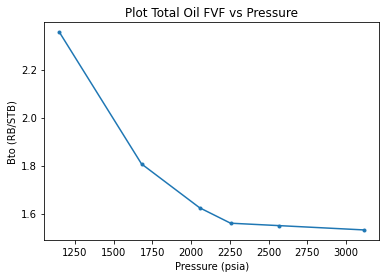

In [9]:
# plot Bto vs pressure
plt.plot(p, Bto, '.-')
plt.title('Plot Total Oil FVF vs Pressure')
plt.xlabel('Pressure (psia)'); plt.ylabel('Bto (RB/STB)')
plt.show()

Plot 11.1

OOIP using Plot 11.1 material balance: 4811739.154572299 STB


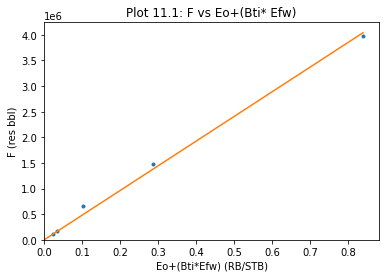

In [10]:
# plot 11.1 and regression to calculate OOIP

def linear(x, a):
  # a: slope
  y = a * x 
  return(y)

popt, pcov = curve_fit(linear, Eo_Bti_Efw[1:], F[1:])
print('OOIP using Plot 11.1 material balance:', popt[0], 'STB')

y = Eo_Bti_Efw * popt[0]

plt.plot(Eo_Bti_Efw, F, '.')
plt.plot(Eo_Bti_Efw, y)
plt.title('Plot 11.1: F vs Eo+(Bti* Efw)')
plt.xlim(xmin=0); plt.ylim(ymin=0)
plt.xlabel('Eo+(Bti*Efw) (RB/STB)'); plt.ylabel('F (res bbl)')
plt.show()

Plot 11.2: Waterdrive Diagnostic Plot

OOIP using Plot 11.2 material balance: 5207192.68980829 STB


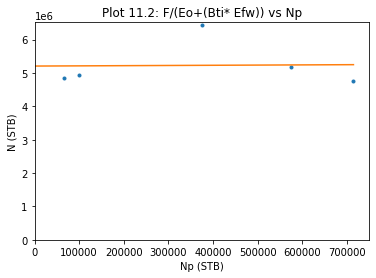

In [11]:
# plot 11.2 and regression to calculate OOIP

def linear(x, a, b):
  # a: slope
  # b: intercept
  y = a * x + b
  return(y)

popt, pcov = curve_fit(linear, Np[1:], N[1:])
print('OOIP using Plot 11.2 material balance:', popt[1], 'STB')

y = Np * popt[0] + popt[1]

plt.plot(Np, N, '.')
plt.plot(Np, y)
plt.title('Plot 11.2: F/(Eo+(Bti* Efw)) vs Np')
plt.xlim(xmin=0); plt.ylim(ymin=0)
plt.xlabel('Np (STB)'); plt.ylabel('N (STB)')
plt.show()

### Example 11.3

In this Example 11.3, we're being instructed to back-calculate to find the oil FVF ($B_o$) at 1,000 psi from the data provided in **Table 11.1** and **Table 11.4**

At 1,000 psi, the pressure has exceeded **below the bubblepoint @ 1,775 psi**, therefore there will be two-phase (oil and gas in free-phase) at 1,000 psi.

From Example 11.1, we already calculated that the **correct** initial oil in place ($N_{foi}$) is 5,063,852 STB.

Here, we compare the result of $B_o$ if we **include PV compressibilities ($E_{fw}$)** and if we **neglect it**.

Steps 1 to 12 has been provided as the solution. Step 1 to 6 are done to calculate the **reservoir volume of the free gas ($V_{gf}$)**.

For calculation **including the compressibilities**, Step 8 and 9 are used. On the other hand, for calculation **neglecting the compressibilities**, Step 10 to 12 are used.

Below is the Python implementation.



In [12]:
# data Table 11.1 used for Example 11.1

# knowns
Boi = 1.484 # RB/STB
cf = 3E-6 # psi^-1
pi = 3000 # psia
pb = 1775 # psia
Rsi = 845 # scf/STB
cw = 3E-6 # psi^-1
swi = .25
temp = 150 # fahrenheit

# production data
p = np.array([3000, 2500, 1000])
Np = np.array([0, 33000, 868505]) # STB
Rp = np.array([0, 845, 1447]) # cumulative produced-gas/oil ratio, scf/STB
Bo = np.array([1.484, 1.490, np.nan]) # RB/STB
z = np.array([np.nan, np.nan, 0.875])
Rs = np.array([845, 845, 570]) # scf/STB

# initial oil in place calculated from Example 11.1
Nfoi = 5063852 # STB

status = []
for i in range(len(p)):
  if p[i] >= pb:
    _ = 'above bubble'
  if p[i] < pb:
    _ = 'below bubble'
  status.append(_)

data = pd.DataFrame({'p': p, 'Np': Np, 'Rp': Rp, 'Bo': Bo, 'z': z, 'Rs': Rs, 'status': status})
data

,p,Np,Rp,Bo,z,Rs,status
0,3000,0,0,1.484,NaN,845,above bubble
1,2500,33000,845,1.490,NaN,845,above bubble
2,1000,868505,1447,NaN,0.875,570,below bubble


In [13]:
" Steps 1 to 6 "

# Step 1. Calculate total initial gas @ 3,000 psi
Rsi = Rs[0]
Gfoi = Nfoi * Rsi
print('Initial total gas @ 3,000 psia:', Gfoi * 1E-9, 'Bscf')

# Step 2. Calculate total remaining gas (dissolved + free-phase) @ 1,000 psi
Gp = Np[-1] * Rp[-1]
print('Produced gas until @ 1,000 psia:', Gp * 1E-9 , 'Bscf')
Gr = Gfoi - Gp
print('Remaining total gas @ 1,000 psia:', Gr * 1E-9, 'Bscf')

# Step 3. Calculate remaining dissolved gas (only) @ 1,000 psi
Gsr = (Nfoi - Np[-1]) * Rs[-1]
print('Remaining dissolved gas @ 1,000 psia:', Gsr * 1E-9, 'Bscf')

# Step 4. Calculate remaining free-phase gas (only) @ 1,000 psi
Gf = Gr - Gsr
print('Remaining free-phase gas @ 1,000 psia:', Gf * 1E-9, 'Bscf')

# Step 5. Calculate Bg in unit res ft3/scf @ 1,000 psi
import sys
sys.path.append('/content/reservoir-engineering/Unit 2 Review of Rock and Fluid Properties/functions')

from gasfvf import *
Bg = gasfvf(z[-1], (temp + 460), p[-1])
print('Gas FVF @ 1,000 psia:', Bg, 'res ft3/scf')

# Step 6. Calculate reservoir volume of the free gas
Vgf = Bg * Gf
print('Reservoir volume of the remaining free-phase gas @ 1,000 psia:', Vgf, 'res ft3')

Initial total gas @ 3,000 psia: 4.27895494 Bscf
Produced gas until @ 1,000 psia: 1.256726735 Bscf
Remaining total gas @ 1,000 psia: 3.0222282050000002 Bscf
Remaining dissolved gas @ 1,000 psia: 2.39134779 Bscf
Remaining free-phase gas @ 1,000 psia: 0.630880415 Bscf
Gas FVF @ 1,000 psia: 0.015094076375 res ft3/scf
Reservoir volume of the remaining free-phase gas @ 1,000 psia: 9522557.167501695 res ft3


Calculating $B_o$ by including the compressibilities, as $E_{fw}$

In [14]:
" Steps 7 to 9 "

# Step 7. Calculate total reservoir gas-oil ratio @ 1,000 psi
# remaining total gas divided by remaining oil in the reservoir @ 1,000 psi

# remaining oil
Nr = Nfoi - Np[-1]
print('Remaining oil @ 1,000 psia:', Nr * 1E-6, 'MMSTB')

Rt = Gr / Nr
print('Total reservoir gas-oil ratio @ 1,000 psia:', Rt, 'scf/STB')

# Step 8. Calculate total oil (oil + dissolved gas) FVF @ 1,000 psi
Boi = Bo[0]

# convert Bg from res ft3/scf to RB/scf
Bg_conv = Bg * .178108

Efw = ((cf + (cw * swi)) / (1 - swi)) * (pi - p[-1])
Bto = ((Np[-1] * Bg_conv * (Rp[-1] - Rsi)) + (Nfoi * Boi * (1 - Efw))) / (Nfoi - Np[-1])
print('Total oil FVF @ 1,000 psia:', Bto, 'RB/STB')

# Step 9. Calculate oil (only oil) FVF @ 1,000 psi
Bo_calculated = Bto - (Bg_conv * (Rsi - Rs[-1]))
print('Oil FVF @ 1,000 psia (including compressibility):', Bo_calculated, 'RB/STB') 

Remaining oil @ 1,000 psia: 4.195347 MMSTB
Total reservoir gas-oil ratio @ 1,000 psia: 720.3762179862596 scf/STB
Total oil FVF @ 1,000 psia: 2.1083355467252582 RB/STB
Oil FVF @ 1,000 psia (including compressibility): 1.3690322141006708 RB/STB


Calculating $B_o$ by neglecting the compressibilities

In [15]:
" Steps 10 to 12 "

# Step 10. Calculate volume occupied by the initial oil
Voi = Nfoi * Boi
print('Volume occupied by the initial oil:', Voi, 'res bbl')

# Step 11. Calculate volume occupied by the current oil
Vo = Voi - (Vgf / 5.61458)
print('Volume occupied by the current oil:', Vo, 'res bbl')

# Step 12. Calculate oil (only oil) FVF @ 1,000 psi
Bo_neglecting = Vo / Nr
print('Oil FVF @ 1,000 psia (neglecting compressibility):', Bo_neglecting, 'RB/STB')

Volume occupied by the initial oil: 7514756.368 res bbl
Volume occupied by the current oil: 5818715.494506044 res bbl
Oil FVF @ 1,000 psia (neglecting compressibility): 1.3869449879845563 RB/STB


## Volatile Undersaturated Oil

### Example. Antioch Field (Volatile-Oil)

Task 1. Calculate OOIP using Plot 1: $F$ vs $Eo+(B_{oi} E_{fw})$

Task 2. Analyze the presence of waterdrive using Plot 2: $\frac{F}{Eo+(B_{oi} E_{fw})}$ vs $N_p$

In [16]:
# knowns
pi = 5070 # psia
temp = 246 # fahrenheit
pb = 4677 # psia
Gfgi = 31.976 # Bscf
Nfoi = 10.992 # MMSTB
Rvi = 343 # STB/MMscf
Rsi = 2909 # scf/STB
Boi = 2.695 # RB/STB
Bgi = .926 # RB/Mscf
swi = .283
poro = .13
k = 174 # md
area = 1568 # acres
h = 24.4 # ft
cf = 6.5E-6 # formation compressibility, psi^-1
cw = 4.5E-6 # water compressibility, psi^-1

# fluid properties and production data
columns = ['p', 'Bo', 'Bg', 'Rs', 'Rv', 'Np', 'Gp']
data = pd.read_csv('/content/reservoir-engineering/Unit 11 Undersaturated-Oil Reservoirs/data/Table 11.5, 11.6-Antioch Volatile-Oil Reservoir Fluid Properties and Production Data.csv', names=columns)
data

,p,Bo,Bg,Rs,Rv,Np,Gp
0,5070.0,2.695,0.000926,2909.0,0.000343,0.0,0.0
1,4998.0,2.713,0.000932,2909.0,0.000343,150000.0,300000.0
2,4798.0,2.740,0.000942,2909.0,0.000343,175000.0,509000.0
3,4698.0,2.754,0.000947,2909.0,0.000343,225000.0,654000.0
4,4658.0,2.707,0.000830,2834.0,0.000116,230000.0,664000.0
5,4598.0,2.631,0.000835,2711.0,0.000111,250000.0,719000.0
6,4498.0,2.484,0.000844,2479.0,0.000109,NaN,NaN
7,4398.0,2.338,0.000853,2247.0,0.000106,385000.0,1090000.0
8,4298.0,2.271,0.000864,2133.0,0.000100,NaN,NaN
9,4198.0,2.203,0.000874,2019.0,0.000094,600000.0,1750000.0


In [17]:
# data cleansing first to remove data with NaN (no data) values

print("NaN values in which column:")
print(data.isnull().sum())

# drop rows with missing values
data.dropna(inplace=True)

# after removal, the index will be not set from 0
# re-index dataframe (in order, started from 0)
data = data.reset_index(drop=True)

p = data['p']
Bo = data['Bo'] # RB/STB
Bg = data['Bg'] # RB/scf
Rs = data['Rs'] # scf/STB
Rv = data['Rv'] # STB/scf
Np = data['Np'] # STB
Gp = data['Gp'] * 1E+3 # Mscf to scf

# add status
status = []
for i in range(len(p)):
  if p[i] >= pb:
    _ = 'above bubble'
  if p[i] < pb:
    _ = 'below bubble'
  status.append(_)

data['status'] = status

data

NaN values in which column:
p      0
Bo     0
Bg     0
Rs     0
Rv     0
Np    18
Gp    18
dtype: int64


,p,Bo,Bg,Rs,Rv,Np,Gp,status
0,5070.0,2.695,0.000926,2909.0,0.000343,0.0,0.0,above bubble
1,4998.0,2.713,0.000932,2909.0,0.000343,150000.0,300000.0,above bubble
2,4798.0,2.740,0.000942,2909.0,0.000343,175000.0,509000.0,above bubble
3,4698.0,2.754,0.000947,2909.0,0.000343,225000.0,654000.0,above bubble
4,4658.0,2.707,0.000830,2834.0,0.000116,230000.0,664000.0,below bubble
5,4598.0,2.631,0.000835,2711.0,0.000111,250000.0,719000.0,below bubble
6,4398.0,2.338,0.000853,2247.0,0.000106,385000.0,1090000.0,below bubble
7,4198.0,2.203,0.000874,2019.0,0.000094,600000.0,1750000.0,below bubble
8,3998.0,2.093,0.000901,1828.0,0.000084,850000.0,2610000.0,below bubble
9,3798.0,1.991,0.000933,1651.0,0.000074,1110000.0,3660000.0,below bubble


In [18]:
# calculate total oil FVF (Bto)
Bto = ((Bo * (1 - (Rv * Rsi))) + (Bg * (Rsi - Rs))) / (1 - (Rv * Rs))

# calculate Eo+(Boi*Efw)
Efw = ((cf + (cw * swi)) / (1 - swi)) * (pi - p)
Eo = Bto - Boi
Eo_Bti_Efw = Eo + Boi * Efw

# F = (Np * (Bto - Rsi * Bg)) + (Gp * Bg)
F = (Np * ((Bo - (Rs * Bg)) / (1 - (Rv * Rs)))) + (Gp * ((Bg - (Rv * Bo)) / (1 - (Rv * Rs))))

N = F / Eo_Bti_Efw


result = pd.DataFrame({'p': p, 'Bto': Bto, 'Eo+Boi*Efw': Eo_Bti_Efw, 'F': F, 'F/(Eo+Boi*Efw)': N})
result

,p,Bto,Eo+Boi*Efw,F,F/(Eo+Boi*Efw)
0,5070.0,2.695000,0.000000,0.000000e+00,NaN
1,4998.0,2.713000,0.020104,3.181654e+05,1.582619e+07
2,4798.0,2.740000,0.052947,4.794261e+05,9.054762e+06
3,4698.0,2.754000,0.069869,6.190859e+05,8.860635e+06
4,4658.0,2.764652,0.081690,6.319726e+05,7.736254e+06
5,4598.0,2.784782,0.103573,6.897880e+05,6.659905e+06
6,4398.0,2.863879,0.188513,1.078790e+06,5.722614e+06
7,4198.0,2.935593,0.266071,1.765142e+06,6.634094e+06
8,3998.0,3.019139,0.355461,2.683941e+06,7.550598e+06
9,3798.0,3.116927,0.459093,3.845548e+06,8.376411e+06


OOIP using Plot 11.1 material balance: 8.005087371256204 MMSTB


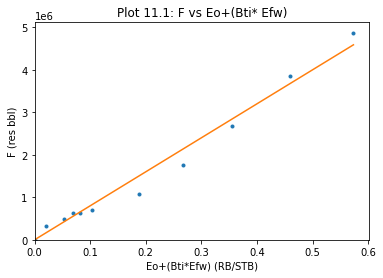

In [19]:
# plot 11.1 and regression to calculate OOIP

def linear(x, a):
  # a: slope
  y = a * x 
  return(y)

popt, pcov = curve_fit(linear, Eo_Bti_Efw[1:], F[1:])
print('OOIP using Plot 11.1 material balance:', popt[0] / 1E+6, 'MMSTB')

y = Eo_Bti_Efw * popt[0]

plt.plot(Eo_Bti_Efw, F, '.')
plt.plot(Eo_Bti_Efw, y)
plt.title('Plot 11.1: F vs Eo+(Bti* Efw)')
plt.xlim(xmin=0); plt.ylim(ymin=0)
plt.xlabel('Eo+(Bti*Efw) (RB/STB)'); plt.ylabel('F (res bbl)')
plt.show()

OOIP using Plot 11.2 material balance: 9.33081152981258 MMSTB


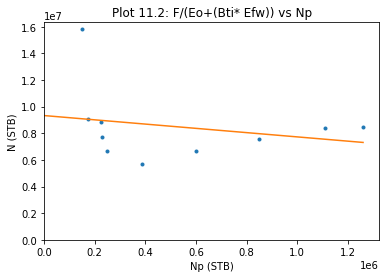

In [20]:
# plot 11.2 and regression to calculate OOIP

def linear(x, a, b):
  # a: slope
  # b: intercept
  y = a * x + b
  return(y)

popt, pcov = curve_fit(linear, Np[1:], N[1:])
print('OOIP using Plot 11.2 material balance:', popt[1] / 1E+6, 'MMSTB')

y = Np * popt[0] + popt[1]

plt.plot(Np, N, '.')
plt.plot(Np, y)
plt.title('Plot 11.2: F/(Eo+(Bti* Efw)) vs Np')
plt.xlim(xmin=0); plt.ylim(ymin=0)
plt.xlabel('Np (STB)'); plt.ylabel('N (STB)')
plt.show()

## Waterdrive Undersaturated Oil Reservoirs

### Example. Eocene Wilcox Reservoir

In [21]:
# knowns
pi = 3793 # psia
pb = 3690 # psia
Gfgi = 23 # Bscf
Nfoi = 25.6 # MMSTB
Rsi = 900 # scf/STB
Boi = 1.54 # RB/STB
Bgi = .0045716 # res ft3/scf
swi = .15
poro = .209
k = 275 # md
area = 1830 # acres
h = 26 # ft

# conversion
Nfoi = Nfoi * 1E+6 # MMSTB to STB
Gfgi = Gfgi * 1E+9 # Bscf to scf
Bgi = Bgi * .178108 # convert res ft3/scf to RB/scf

# compressibility not known, assume same to Antioch Field (previous Example)
# Efw can be seen in the result Table 11.9, from which we can calculate the 
# ((cf + (cw * swi)) / (1 - swi)) term by dividing Efw by (pi-p)
# this term will next be multiplied with (pi-p) for other pressure data
Efw_known = .0000315
pi_min_p_known = pi - 3786
compressibility_constant = Efw_known / pi_min_p_known

# data
columns = ['date', 'p', 'Np', 'Rp', 'Wp', 'Bg', 'Bt']
data = pd.read_csv('/content/reservoir-engineering/Unit 11 Undersaturated-Oil Reservoirs/data/Table 11.8-Wilcox Reservoir Properties and Production Data.csv', names=columns)

"Converting to Panda datetime"
# time data in format: 01/01/1942
data['date'] =  pd.to_datetime(data['date'], format='%d/%m/%Y') # format check web: https://strftime.org/

# add Gp and Rv as zeros
p = data['p']
Gp = np.zeros(len(p))
Rv = np.zeros(len(p)) # the oil reservoir is non-volatile
data['Gp'] = Gp
data['Rv'] = Rv

# add status
status = []
for i in range(len(p)):
  if p[i] >= pb:
    _ = 'above bubble'
  if p[i] < pb:
    _ = 'below bubble'
  status.append(_)

data['status'] = status

data.head(10) # already converted to YYYY-MM-DD

,date,p,Np,Rp,Wp,Bg,Bt,Gp,Rv,status
0,1942-01-01,3786,13549,900,0,0.004693,1.540,0.0,0.0,above bubble
1,1942-01-01,3768,49005,900,370,0.004715,1.541,0.0,0.0,above bubble
2,1942-01-01,3739,99774,900,1030,0.004744,1.542,0.0,0.0,above bubble
3,1942-01-01,3699,171884,900,1750,0.004787,1.543,0.0,0.0,above bubble
4,1943-01-01,3657,324843,900,2834,0.004833,1.547,0.0,0.0,below bubble
5,1943-01-01,3613,528068,919,4840,0.004882,1.553,0.0,0.0,below bubble
6,1943-01-02,3558,788009,914,7749,0.004946,1.561,0.0,0.0,below bubble
7,1943-01-03,3511,1066911,910,13895,0.005002,1.567,0.0,0.0,below bubble
8,1944-01-01,3476,1339902,911,24808,0.005046,1.573,0.0,0.0,below bubble
9,1944-01-01,3414,1615461,917,37653,0.005086,1.582,0.0,0.0,below bubble


Reservoir is non-volatile, because $R_v=0$. 

There is no data on $R_s$, but $B_{to}$ can be calculated through **Eq 11.15** if oil in place $N_{foi}$ is known. In this Example, yes, $N_{foi}$ is known (from volumetrics).

$$B_{to}=\frac{N_pB_g(R_p-R_{si})+N_{foi}B_{oi}(1-E_{fw})}{N_{foi}-N_p}$$

In [28]:
# calculate Efw
Efw = compressibility_constant * (pi - p)

# calculate Bto
Np = data['Np'].values
Bg = data['Bg'].values # res ft3/scf
Bg = Bg * .178108 # convert res ft3/scf to RB/scf
Rp = data['Rp'].values

Bto = ((Np * Bg * (Rp - Rsi)) + (Nfoi * Boi * (1 - Efw))) / (Nfoi - Np)

# calculate Eo
Eo = Bto - Boi

Eo_Boi_Efw = Eo + Boi * Efw
F = (Np * (Bto - Rsi * Bg)) + (Gp * Bg)
N = F / Eo_Boi_Efw

result = pd.DataFrame({'p': p, 'Eo': Eo, 'Efw': Efw, '(Eo+(Boi*Efw))': Eo_Boi_Efw, 'F': F, 'F/(Eo+(Boi*Efw))': N})
result.head(10)

,p,Eo,Efw,(Eo+(Boi*Efw)),F,F/(Eo+(Boi*Efw))
0,3786,0.000767,0.000031,0.000815,1.068249e+04,1.309991e+07
1,3768,0.002780,0.000112,0.002953,3.856668e+04,1.305894e+07
2,3739,0.005650,0.000243,0.006024,7.834167e+04,1.300482e+07
3,3699,0.009754,0.000423,0.010405,1.344944e+05,1.292546e+07
4,3657,0.018838,0.000612,0.019780,2.547416e+05,1.287850e+07
5,3613,0.031510,0.000810,0.032757,4.166151e+05,1.271822e+07
6,3558,0.047621,0.001058,0.049249,6.263210e+05,1.271740e+07
7,3511,0.065321,0.001269,0.067275,8.572228e+05,1.274207e+07
8,3476,0.083283,0.001427,0.085480,1.091341e+06,1.276723e+07
9,3414,0.101959,0.001705,0.104586,1.335481e+06,1.276923e+07


Comment: Result of $B_{to}$, hence the $E_o$ are different from the book.

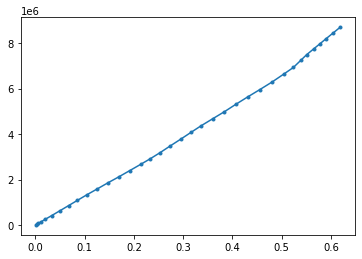

In [29]:
plt.plot(Eo_Boi_Efw, F, '.-')

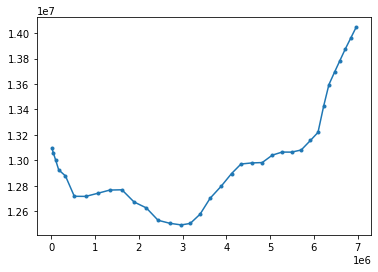

In [30]:
plt.plot(Np, N, '.-')